<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Boston_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_boston = pd.read_csv('sample_data/boston_house.csv')
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [ ]:
data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


# Data Cleansing

Memastikan data bersih

In [ ]:
data_boston.isna().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

# Memeriksa kolerasi data

sebelum membuat model, cek dahulu kolerasinya

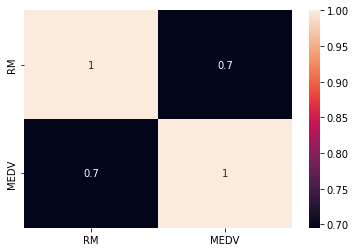

In [ ]:
sns.heatmap(data_boston[['RM', 'MEDV']].corr(), annot=True)

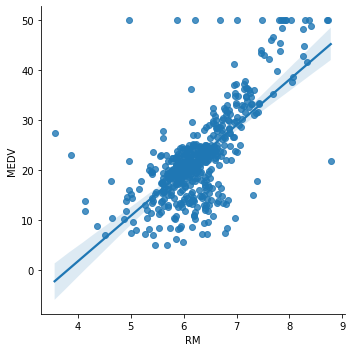

In [ ]:
sns.lmplot(x='RM', y='MEDV', data=data_boston)

# Proses melatih data dan membuat model

proses training dahulu lalu membuat model

In [ ]:
x = data_boston[['RM']]
y = data_boston[['MEDV']]

# Proses membagi data menjadi 70 : 30

70 untuk data training
30 untuk data testing

In [ ]:
# Training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10)

In [ ]:
# Membuat model

from sklearn.linear_model import LinearRegression

otak_boston = LinearRegression()
otak_boston.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test

# Uji Coba disini

In [ ]:
otak_boston.intercept_, otak_boston.coef_

(array([-33.08792189]), array([[8.80317873]]))

In [ ]:
x = 6.9
y = -34.3202137 + 9.02702503 * x
print(y)

27.966259007000012


Text(0.5, 1.0, 'Plot room dan penghuni')

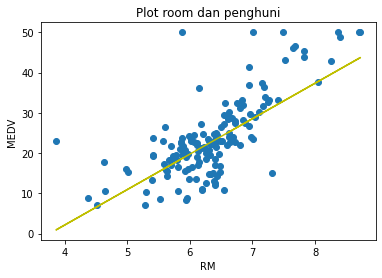

In [ ]:
y_pred = otak_boston.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='y')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Plot room dan penghuni')

# Evaluasi model

In [ ]:
otak_boston.score(x_test, y_test)

0.5383003344910231

# Perbandingan prediksi dan aktual

In [ ]:
y_predict = otak_boston.predict(x_test)

evaluasi = pd.DataFrame({
    'RM': y_test.values.flatten(),
    'MEDV' : y_predict.flatten()
    })

evaluasi

,RM,MEDV
0,28.4,25.153909
1,31.1,26.773693
2,23.5,22.284072
3,26.6,27.997335
4,19.6,14.484456
...,...,...
147,24.7,23.102768
148,21.0,18.410674
149,19.4,17.856073
150,10.9,21.509393


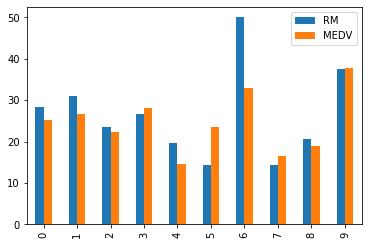

In [ ]:
evaluasi.head(10).plot(kind='bar')

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error (y_test, y_predict))

45.07733942471831
